# Customer Churn Analysis

## **PROCESS**

        1. Import Dependencies
        2. Handle Null Values (perform zero or mean/median imputation)
        3. Label Encoding Categorial Columns
        4. Scale Input Data (if multiple input columns exists & the range of those columns are different)
        5. Scale Output Data (if multiple output columns exists & the range of those columns are different)
        6. Split the Input, Output Data
        7. Choose Correct Model
        8. Train the Model
        9. Evaluate the Model

In [1]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
telco_customer_churn_data = pd.read_csv('D:/Flip-Robo/Telecom_customer_churn.csv')

In [3]:
telco_customer_churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_customer_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
telco_customer_churn_data.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

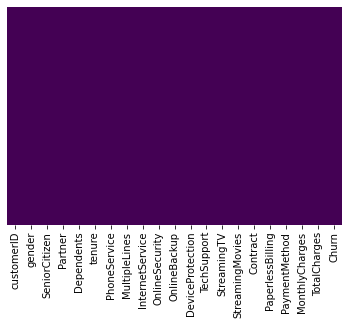

In [6]:
sns.heatmap(telco_customer_churn_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Churn', ylabel='count'>

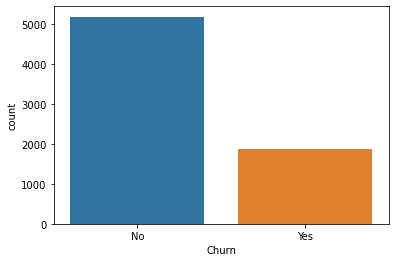

In [7]:
sns.countplot(x='Churn',data=telco_customer_churn_data)

<AxesSubplot:xlabel='Churn', ylabel='count'>

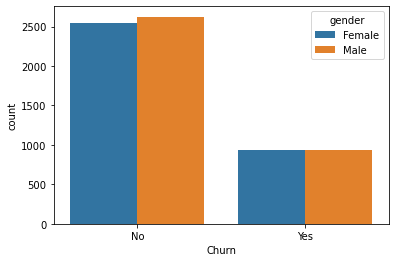

In [8]:
sns.countplot(x='Churn',hue='gender',data=telco_customer_churn_data)

<AxesSubplot:xlabel='Churn', ylabel='count'>

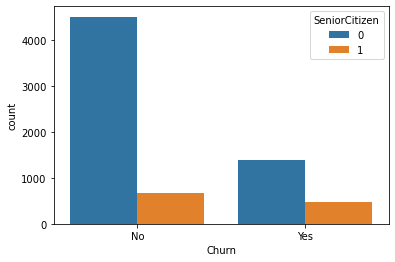

In [9]:
sns.countplot(x='Churn',hue='SeniorCitizen',data=telco_customer_churn_data)

<AxesSubplot:xlabel='Churn', ylabel='count'>

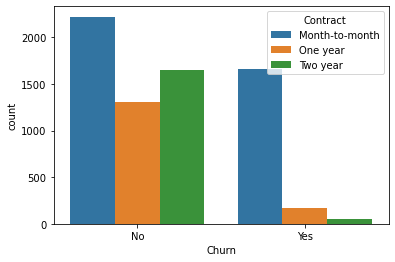

In [10]:
sns.countplot(x='Churn',hue='Contract',data=telco_customer_churn_data)

In [11]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
yes_no_mapping = {'Yes':1,'No':0}

telco_customer_churn_data['Partner'] = telco_customer_churn_data['Partner'].map(yes_no_mapping)
telco_customer_churn_data['Dependents'] = telco_customer_churn_data['Dependents'].map(yes_no_mapping)
telco_customer_churn_data['PhoneService'] = telco_customer_churn_data['PhoneService'].map(yes_no_mapping)

In [13]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [14]:
internet_service_mapping = {'Yes':1,'No':0,'No internet service':0}

telco_customer_churn_data['OnlineSecurity'] = telco_customer_churn_data['OnlineSecurity'].map(internet_service_mapping)
telco_customer_churn_data['OnlineBackup'] = telco_customer_churn_data['OnlineBackup'].map(internet_service_mapping)
telco_customer_churn_data['DeviceProtection'] = telco_customer_churn_data['DeviceProtection'].map(internet_service_mapping)
telco_customer_churn_data['TechSupport'] = telco_customer_churn_data['TechSupport'].map(internet_service_mapping)
telco_customer_churn_data['StreamingTV'] = telco_customer_churn_data['StreamingTV'].map(internet_service_mapping)
telco_customer_churn_data['StreamingMovies'] = telco_customer_churn_data['StreamingMovies'].map(internet_service_mapping)

phone_service_mapping = {'Yes':1,'No':0,'No phone service':0}

telco_customer_churn_data['MultipleLines'] = telco_customer_churn_data['MultipleLines'].map(phone_service_mapping)

In [15]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [16]:
DSLFiberMapping = {'DSL':1,'Fiber optic':1,'No':0}

telco_customer_churn_data['InternetService'] = telco_customer_churn_data['InternetService'].map(DSLFiberMapping)

In [17]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [18]:
ContractMapping = {'Month-to-month':'MM','One year':'OY','Two year':'TY'}

telco_customer_churn_data['Contract'] = telco_customer_churn_data['Contract'].map(ContractMapping)

In [19]:
telco_customer_churn_data['PaperlessBilling'] = telco_customer_churn_data['PaperlessBilling'].map(yes_no_mapping)

In [20]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,OY,1,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,OY,1,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,MM,1,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,MM,1,Mailed check,74.40,306.6,Yes


In [21]:
PaymentMapping = {'Electronic check':'Check','Mailed check':'Check','Bank transfer (automatic)':'Bank','Credit card (automatic)':'Card'}

telco_customer_churn_data['PaymentMethod'] = telco_customer_churn_data['PaymentMethod'].map(PaymentMapping)

In [22]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank,42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,OY,1,Check,84.80,1990.5,No
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,OY,1,Card,103.20,7362.9,No
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,MM,1,Check,29.60,346.45,No
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,MM,1,Check,74.40,306.6,Yes


In [23]:
telco_customer_churn_data['Churn'] = telco_customer_churn_data['Churn'].map(yes_no_mapping)

In [24]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,0,0,0,0,MM,1,Check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,1,0,0,0,OY,0,Check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,0,0,0,0,MM,1,Check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,1,1,0,0,OY,0,Bank,42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,0,0,0,0,MM,1,Check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,1,1,1,OY,1,Check,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,0,1,1,OY,1,Card,103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,0,0,0,0,MM,1,Check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,0,0,0,0,MM,1,Check,74.40,306.6,1


In [25]:
pd.get_dummies(telco_customer_churn_data['gender'],drop_first=True)

,Male
0,0
1,1
2,1
3,1
4,0
...,...
7038,1
7039,0
7040,0
7041,1


In [26]:
sex = pd.get_dummies(telco_customer_churn_data['gender'],drop_first=True)

In [27]:
sex

,Male
0,0
1,1
2,1
3,1
4,0
...,...
7038,1
7039,0
7040,0
7041,1


In [28]:
constract = pd.get_dummies(telco_customer_churn_data['Contract'],drop_first=True)

In [29]:
constract

,OY,TY
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
7038,1,0
7039,1,0
7040,0,0
7041,0,0


In [30]:
paymethod = pd.get_dummies(telco_customer_churn_data['PaymentMethod'],drop_first=True)

In [31]:
sex.head()

,Male
0,0
1,1
2,1
3,1
4,0


In [32]:
constract.head()

,OY,TY
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [33]:
paymethod.head()

,Card,Check
0,0,1
1,0,1
2,0,1
3,0,0
4,0,1


In [34]:
telco_customer_churn_data = pd.concat([telco_customer_churn_data, sex, constract, paymethod], axis=1)

In [35]:
telco_customer_churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male,OY,TY,Card,Check
0,7590-VHVEG,Female,0,1,0,1,0,0,1,0,...,1,Check,29.85,29.85,0,0,0,0,0,1
1,5575-GNVDE,Male,0,0,0,34,1,0,1,1,...,0,Check,56.95,1889.5,0,1,1,0,0,1
2,3668-QPYBK,Male,0,0,0,2,1,0,1,1,...,1,Check,53.85,108.15,1,1,0,0,0,1
3,7795-CFOCW,Male,0,0,0,45,0,0,1,1,...,0,Bank,42.30,1840.75,0,1,1,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,1,Check,70.70,151.65,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,1,1,...,1,Check,84.80,1990.5,0,1,1,0,0,1
7039,2234-XADUH,Female,0,1,1,72,1,1,1,0,...,1,Card,103.20,7362.9,0,0,1,0,1,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,1,1,...,1,Check,29.60,346.45,0,0,0,0,0,1
7041,8361-LTMKD,Male,1,1,0,4,1,1,1,0,...,1,Check,74.40,306.6,1,1,0,0,0,1


In [36]:
telco_customer_churn_data.drop(['customerID', 'gender', 'PaymentMethod', 'Contract'], axis=1, inplace=True)

In [37]:
telco_customer_churn_data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Male,OY,TY,Card,Check
0,0,1,0,1,0,0,1,0,1,0,...,0,1,29.85,29.85,0,0,0,0,0,1
1,0,0,0,34,1,0,1,1,0,1,...,0,0,56.95,1889.5,0,1,1,0,0,1
2,0,0,0,2,1,0,1,1,1,0,...,0,1,53.85,108.15,1,1,0,0,0,1
3,0,0,0,45,0,0,1,1,0,1,...,0,0,42.30,1840.75,0,1,1,0,0,0
4,0,0,0,2,1,0,1,0,0,0,...,0,1,70.70,151.65,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,1,1,0,1,...,1,1,84.80,1990.5,0,1,1,0,0,1
7039,0,1,1,72,1,1,1,0,1,1,...,1,1,103.20,7362.9,0,0,1,0,1,0
7040,0,1,1,11,0,0,1,1,0,0,...,0,1,29.60,346.45,0,0,0,0,0,1
7041,1,1,0,4,1,1,1,0,0,0,...,0,1,74.40,306.6,1,1,0,0,0,1


In [48]:
telco_customer_churn_data['TotalCharges'] = telco_customer_churn_data['TotalCharges'].str.strip()
telco_customer_churn_data['TotalCharges'] = telco_customer_churn_data['TotalCharges'].apply(lambda x:x.replace(' ', '0'))
telco_customer_churn_data['TotalCharges'] = telco_customer_churn_data['TotalCharges'].astype(float)

AttributeError: Can only use .str accessor with string values!

In [49]:
telco_customer_churn_data.columns.values

array(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Male', 'OY', 'TY', 'Card', 'Check'],
      dtype=object)

In [50]:
Y = telco_customer_churn_data['Churn'].values
X = telco_customer_churn_data.drop(['Churn'], axis=1).values

In [51]:
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (7043, 21)
Y shape:  (7043,)


<AxesSubplot:ylabel='count'>

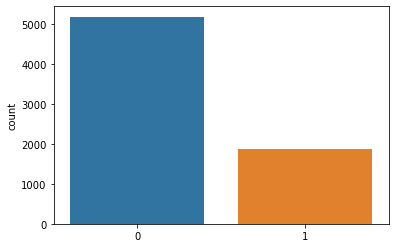

In [52]:
# Plot Imbalance 
sns.countplot(x=Y)


In [65]:
# Handle Imbalance / Oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X, Y = sm.fit_resample(X, Y.ravel())

AttributeError: 'NoneType' object has no attribute 'split'

<AxesSubplot:ylabel='count'>

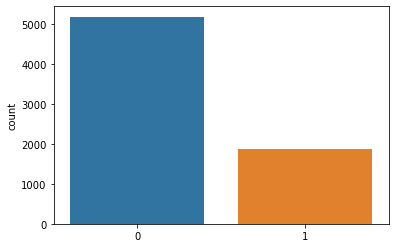

In [54]:
sns.countplot(x=Y)

In [55]:
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

X shape:  (7043, 21)
Y shape:  (7043,)


In [56]:
# Standardize / Scale the Data
from sklearn.preprocessing import StandardScaler # Map Values Between (-1,1)
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [57]:
# Train and Test Split Data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [58]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(Xtrain, Ytrain) # Training Model

RandomForestClassifier()

In [59]:
Ptrain = rfc.predict(Xtrain)
Ptest = rfc.predict(Xtest)

In [60]:
# Model Accuracy
from sklearn.metrics import accuracy_score

print("Train accuracy: ", accuracy_score(Ytrain, Ptrain))
print("Test accuracy: ", accuracy_score(Ytest, Ptest))

Train accuracy:  0.9984025559105432
Test accuracy:  0.7835344215755855


In [61]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(Xtrain, Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [62]:
Ptrain = xgb.predict(Xtrain)
Ptest = xgb.predict(Xtest)

In [63]:
from sklearn.metrics import accuracy_score

print("Train accuracy: ", accuracy_score(Ytrain, Ptrain))
print("Test accuracy: ", accuracy_score(Ytest, Ptest))

Train accuracy:  0.9286474973375932
Test accuracy:  0.7885024840312278
